In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1)

In [2]:
data=pd.read_csv(r'C:\Users\stbch\Downloads\employee.csv')

In [3]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

# 2)

In [6]:
data1=pd.read_csv(r'C:\Users\stbch\Downloads\employee.csv',index_col='name')
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3)

In [7]:
data.loc[data['name']=='Jack Morgan']

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674


In [8]:
data.loc[data['name']=='Josh Wills']

,name,age,income,gender,department,grade,performance_score
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4)

In [9]:
data.groupby('department').get_group('Sales')

,name,age,income,gender,department,grade,performance_score
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [10]:
data.groupby('department').get_group('Finance')

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 5)

In [11]:
data.loc[data['performance_score']>700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6)

In [12]:
data.loc[(data['performance_score']>500) & (data['performance_score']<700)] 

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7)

In [13]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [14]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [15]:
data['age']=data['age'].fillna(data['age'].mean())

In [18]:
data.isna().sum()

name                 0
age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [19]:
data['gender'].mode()

0    F
dtype: object

In [22]:
data['gender']=data['gender'].fillna('F')

In [23]:
data.isna().sum()

name                 0
age                  0
income               2
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [24]:
data['income']=data['income'].fillna(data['income'].median())

In [25]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8)

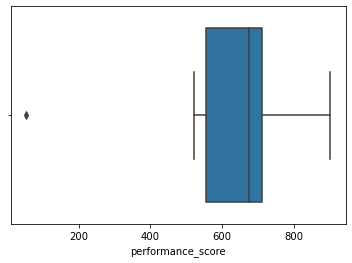

In [29]:
sns.boxplot(x='performance_score',data=data)
plt.show()

In [30]:
Q1 = np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation='midpoint')

In [31]:
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR

In [32]:
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)

Q1 is: 556.0
Q2 is: 674.0
Q3 is: 711.0
IQR = Q3 - Q1 = 155.0
Lower limit is : 323.5
Upper limit is : 943.5


In [33]:
Outliers=[]
for x in data['performance_score']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers are :\n',Outliers)

Outliers are :
 [53]


In [35]:
ind1 = data['performance_score']<low_limit
data.loc[ind1].index

Int64Index([6], dtype='int64')

In [36]:
data.drop([6],inplace=True)

In [37]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.000000,52000.0,F,Operations,G3,723
1,S Kumar,40.428571,16000.0,F,Finance,G0,520
2,Jack Morgan,32.000000,35000.0,M,Finance,G2,674
3,Ying Chin,45.000000,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
5,Satyam Sharma,40.428571,62000.0,F,Sales,G3,649
7,Josh Wills,54.000000,52000.0,F,Finance,G3,901
8,Leo Duck,23.000000,98000.0,M,Sales,G4,709


<AxesSubplot:xlabel='performance_score'>

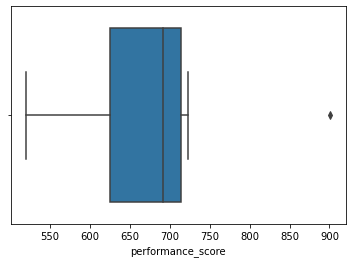

In [38]:
sns.boxplot(x='performance_score',data=data)

# 9)

In [39]:
data2=pd.get_dummies(data['gender'])
data2

,F,M
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
7,1,0
8,0,1


# 10)

In [41]:
data.describe()

,age,income,performance_score
count,8.000000,8.000000,8.00000
mean,38.732143,52750.000000,680.37500
std,9.903157,24099.496142,116.16729
min,23.000000,16000.000000,520.00000
25%,31.500000,40250.000000,625.75000
50%,40.428571,52000.000000,691.50000
75%,45.000000,62750.000000,714.00000
max,54.000000,98000.000000,901.00000


In [45]:
x=data.drop(['name', 'age', 'income', 'gender', 'department', 'grade'],axis=1)
x.describe()

,performance_score
count,8.00000
mean,680.37500
std,116.16729
min,520.00000
25%,625.75000
50%,691.50000
75%,714.00000
max,901.00000


In [46]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00


# Activity by
                     

# Group 7